# Coupon Collector Problem - Not Finished Yet

## Introduction

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd
import seaborn as sbn

In [2]:
coupons = []
uniques = []
winners = []
purchases = []

In [16]:
# Generate the winning set of coupons
def generate_winning_set(num_uniques):
    for coupon in range(num_uniques):
        winners.append(coupon + 1)
    return winners

# Buy an ice cream and collect the corresponding coupon
def buy_ice_cream(num_uniques):
    coupon = random.randint(1, num_uniques)
    coupons.append(coupon)
    return coupons

# Find the unique coupons collected 
def check_coupons(coupons):
    for coupon in coupons:
        if coupon not in uniques:
            uniques.append(coupon)
    return uniques

# Function to clear lists to start a new game
def clear_lists():
    coupons.clear()
    uniques.clear()
    winners.clear()
    
# Play the coupon collector game 
def play_game(num_uniques):
    # Every game is considered a 'new game' so we need to clear the lists
    clear_lists()
    
    # Used as a counter for the total purchases to win the game. 
    total_purchases = 0
    
    # Generate winning tickets
    winners = generate_winning_set(num_uniques)
    
    # Buy ice creams until the set of winning tickets is collected. 
    while uniques != winners:
        # collect a coupon
        buy_ice_cream(num_uniques)
        
        # Increase counter by 1
        total_purchases += 1
        
        # filter the coupons
        check_coupons(coupons)
        
        # sort the coupons
        uniques.sort()
        
        # If the uniques equals the winning set, the costumer won the prize
        if(uniques == winners):
            purchases.append(total_purchases)
            break
            
def gather_game_data(num_unique, trial_amount):
    purchases.clear()
    trials = [num_unique] * trial_amount
    for trial in trials:
        play_game(trial)
    purchases.sort()
    minimum = purchases[0]
    maximum = purchases[trial_amount - 1]
    mean = sum(purchases) / len(purchases)  
    var = sum([((x - mean) ** 2) for x in purchases]) / len(purchases)
    res = var ** 0.5
    #data = {'Needed': num_unique, 'Trials': trial_amount, 'Mean': mean, 'Variance': var, "Residual": res,
           #"Minimum": minimum, "Maximum": maximum}
    #data_items = data.items()
    #data_list = list(data_items)
    game_data = [num_unique, trial_amount, mean, res, minimum, maximum]
    return game_data

def gather_all_games_data(coupons_needed_list, trial_amount):
    num_trials = trial_amount
    games = []
    dataframe = pd.DataFrame(columns = ['Coupons Needed', 'Trials', 'Mean', 'Standard Deviation', 'Minimum', 'Maximum'])
    for i in range(len(coupons_needed_list)):
        game_data = gather_game_data(num_unique = coupons_needed_list[i], trial_amount = num_trials)
        games.append(game_data)
        dataframe.loc[len(dataframe)] = game_data
    return dataframe

In [20]:
coupons_needed_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
dataframe = gather_all_games_data(coupons_needed_list, 10)

In [21]:
dataframe

,Coupons Needed,Trials,Mean,Standard Deviation,Minimum,Maximum
0,10.0,10.0,27.1,9.771898,16.0,52.0
1,20.0,10.0,77.8,30.593463,53.0,147.0
2,30.0,10.0,115.1,22.997609,93.0,178.0
3,40.0,10.0,172.8,43.395391,123.0,262.0
4,50.0,10.0,246.8,90.818280,176.0,471.0
5,60.0,10.0,309.9,92.366065,165.0,451.0
6,70.0,10.0,333.8,61.736213,251.0,449.0
7,80.0,10.0,380.5,79.318661,242.0,506.0
8,90.0,10.0,422.3,65.641526,339.0,523.0
9,100.0,10.0,502.2,127.866180,343.0,812.0


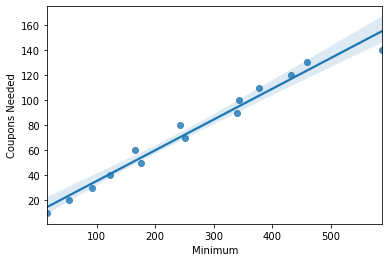

In [26]:
tips = sbn.load_dataset("tips")
ax = sbn.regplot(x=dataframe['Minimum'], y=dataframe["Coupons Needed"], data=dataframe)